In [99]:
# import fancyimpute as fi
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import variation
from math import isnan

In [100]:
true_counts = np.loadtxt('../raw_data/counts.txt')
true_counts.shape
predicted = np.loadtxt('./predictions/combined_var_l2_stacking/run.prediction')

output_directory = './predictions/combined_var_l2_stacking/'

raw_text_out = open(output_directory + str("evaluation.txt"),mode='w')

subsampling = .1

# mask = np.loadtxt('./testing/holdout_mask_counts.txt')
# held_out_counts = np.loadtxt('./testing/held_out_counts.txt')

In [101]:
# Optional adjustment to truncate lower-expressing genes.
# expression_level_mask = np.mean(true_counts,axis=0) > 1
# true_counts = true_counts.T[expression_level_mask].T
# predicted = predicted.T[expression_level_mask].T

In [102]:


raw_text_out.write("=================================================\n")
raw_text_out.write("Basic evaluation: \n")

raw_text_out.write("Pearson R\n")
raw_text_out.write(str(pearsonr(predicted.flatten(),true_counts.flatten())) + "\n")

raw_text_out.write("MSE\n")
raw_text_out.write(str(np.mean((predicted.flatten() - true_counts.flatten()) ** 2)) + "\n")

raw_text_out.write("MAE\n")
raw_text_out.write(str(np.mean(np.abs(predicted.flatten() - true_counts.flatten()))) + "\n")


raw_text_out.close()

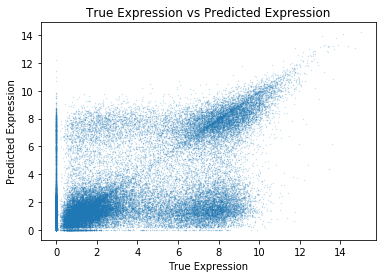

In [103]:
random_mask = np.random.rand(*true_counts.flatten().shape) < (subsampling/10)

plt.figure("general_scatter")
plt.title("True Expression vs Predicted Expression")
plt.scatter(true_counts.flatten()[random_mask],predicted.flatten()[random_mask],s=.1,alpha=.3)
plt.xlabel("True Expression")
plt.ylabel("Predicted Expression")
plt.savefig(output_directory+"general_scatter.png")

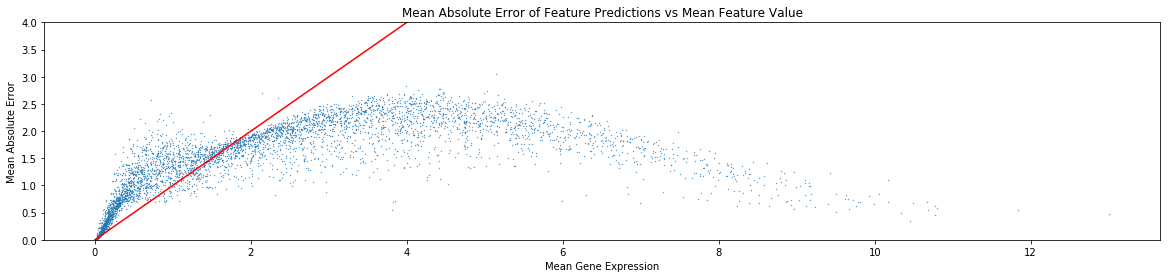

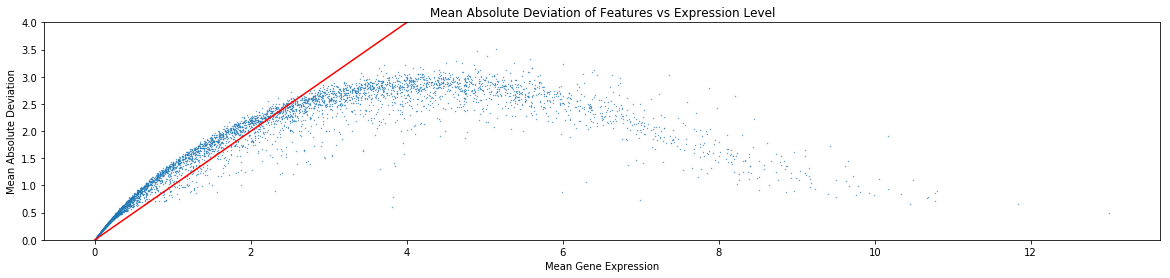

In [104]:

plt.figure("mae_vs_mean",figsize=(20,4))
plt.title("Mean Absolute Error of Feature Predictions vs Mean Feature Value")
plt.scatter(np.mean(true_counts,axis=0),np.mean(np.abs(true_counts - predicted), axis=0),s=.1)
plt.plot([0,4],[0,4],c='r')
plt.xlabel("Mean Gene Expression")
plt.ylabel("Mean Absolute Error")
plt.ylim((0,4))
plt.savefig(output_directory+"mae_vs_mean.png")

# Calculate MAE
mae = np.mean(np.abs(true_counts - np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1))), axis=0)

plt.figure("mean_abs_dev_vs_mean",figsize=(20,4))
plt.title("Mean Absolute Deviation of Features vs Expression Level")
plt.scatter(np.mean(true_counts,axis=0),mae,s=.1)
plt.plot([0,4],[0,4],c='r')
plt.xlabel("Mean Gene Expression")
plt.ylabel("Mean Absolute Deviation")
plt.ylim((0,4))
plt.savefig(output_directory+"mean_abs_dev_vs_mean.png")

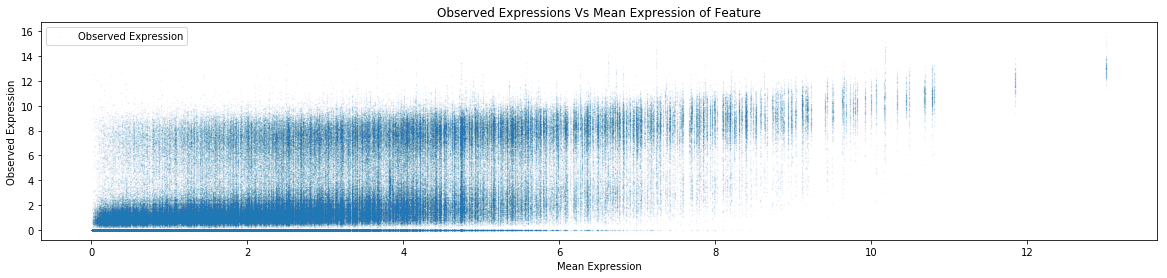

In [105]:
random_mask = np.random.rand(*true_counts.flatten().shape) < subsampling

plt.figure("bimodal_scatter_by_mean",figsize=(20,4))
plt.title("Observed Expressions Vs Mean Expression of Feature")
plt.scatter(np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1)).flatten()[random_mask],true_counts.flatten()[random_mask],s=.1,alpha=.1, label="Observed Expression")
# plt.scatter(np.mean(true_counts,axis=0),np.median(true_counts,axis=0),c='r',s=.5, label="Mean Expression")
plt.xlabel("Mean Expression")
plt.ylabel("Observed Expression")
plt.legend()
plt.savefig(output_directory+"bimodal_scatter_by_mean.png")

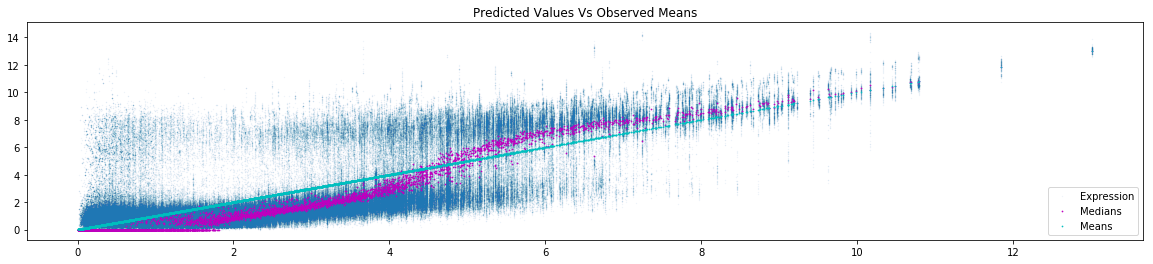

In [106]:
# print true_counts[:10,:10]

random_mask = np.random.rand(*true_counts.flatten().shape) < subsampling

plt.figure("bimodal_scatter_by_mean_predicted",figsize=(20,4))
plt.title("Predicted Values Vs Observed Means")
plt.scatter(np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1)).flatten()[random_mask],predicted.flatten()[random_mask],s=.1,alpha=.1,label="Expression")
plt.scatter(np.mean(true_counts,axis=0),np.median(true_counts,axis=0),c='m',s=.5,label="Medians")
plt.scatter(np.mean(true_counts,axis=0),np.mean(true_counts,axis=0),c='c',s=.5,label="Means")
plt.legend()
plt.savefig(output_directory+"bimodal_scatter_by_mean_predicted.png")

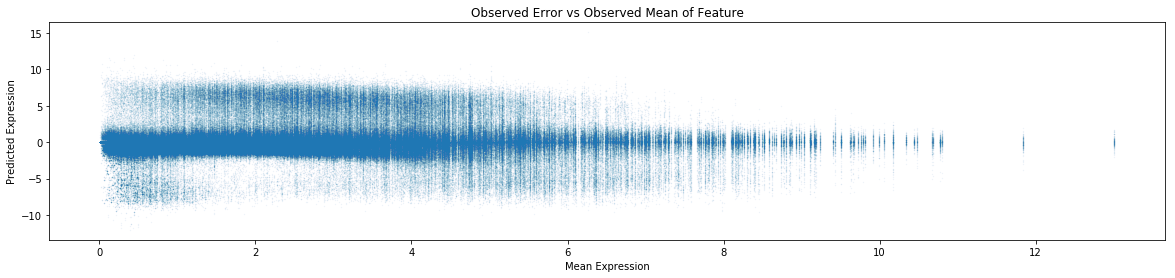

In [107]:
random_mask = np.random.rand(*true_counts.flatten().shape) < subsampling

plt.figure("error_scatter_by_mean", figsize=(20,4))
plt.title("Observed Error vs Observed Mean of Feature")
plt.scatter(np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1)).flatten()[random_mask],(true_counts - predicted).flatten()[random_mask],alpha=.1,s=.1)
plt.xlabel("Mean Expression")
plt.ylabel("Predicted Expression")
plt.savefig(output_directory+"error_scatter_by_mean.png")

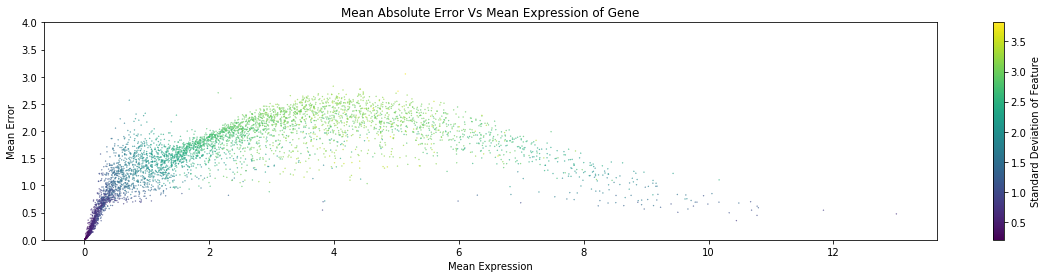

In [108]:
plt.figure("mean_error_vs_mean",figsize=(20,4))
plt.title("Mean Absolute Error Vs Mean Expression of Gene")
plt.scatter(np.mean(true_counts,axis=0),np.mean(np.abs(true_counts-predicted),axis=0),s=.1,c=np.std(true_counts,axis=0))
plt.colorbar(label="Standard Deviation of Feature")
# plt.plot([0,3],[0,3])
plt.ylim((0,4))
plt.xlabel("Mean Expression")
plt.ylabel("Mean Error")
plt.savefig(output_directory+"mean_error_vs_mean.png")

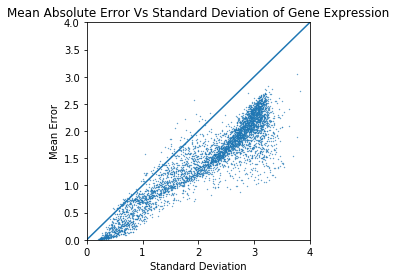

In [109]:
plt.figure("mean_error_vs_std",figsize=(4,4))
plt.title("Mean Absolute Error Vs Standard Deviation of Gene Expression")
plt.scatter(np.std(true_counts,axis=0),np.mean(np.abs(true_counts-predicted),axis=0),s=.1)
# plt.colorbar(label="Standard Deviation of Feature")
plt.plot([0,4],[0,4])
plt.ylim((0,4))
plt.xlim((0,4))
plt.xlabel("Standard Deviation")
plt.ylabel("Mean Error")
plt.savefig(output_directory+"mean_error_vs_std.png")

/Users/boris/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


4773


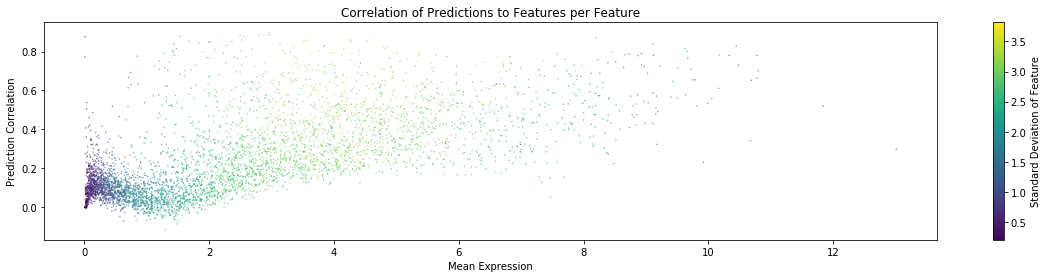

In [110]:
# true_counts = np.loadtxt('../raw_data/counts.txt')
# predicted = np.loadtxt('./predictions/combined_mixed')

correlations = []

for i in range(true_counts.shape[1]):
    
    correlations.append(pearsonr(true_counts[:,i],predicted[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
        

print len(correlations)    

plt.figure("correlation_vs_mean",figsize=(20,4))
plt.title("Correlation of Predictions to Features per Feature")
plt.scatter(np.mean(true_counts,axis=0),correlations,s=.1,c=np.std(true_counts,axis=0))
plt.colorbar(label="Standard Deviation of Feature")
plt.xlabel("Mean Expression")
plt.ylabel("Prediction Correlation")
plt.savefig(output_directory+"correlation_vs_mean.png")

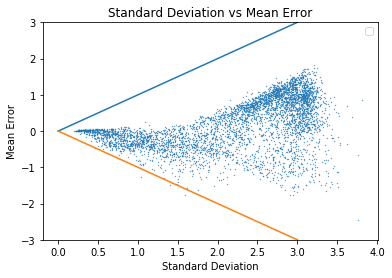

In [111]:
from scipy.stats import linregress

x = np.std(true_counts,axis=0)
y = np.mean(true_counts-predicted,axis=0)

slope, intercept, rvalue, pvalue, std_err = linregress(x, y=y)

plt.figure("mean_error_vs_variance")
plt.title("Standard Deviation vs Mean Error")
plt.scatter(x,y,s=.1)
# plt.plot(x,x*slope + intercept, 'r', label = str(np.around(rvalue,decimals=3)))
plt.plot([0,3],[0,3])
plt.plot([0,3],[0,-3])
plt.ylim((-3,3))
plt.xlabel("Standard Deviation")
plt.ylabel("Mean Error")
plt.legend()
plt.savefig(output_directory+"mean_error_vs_variance.png")

4773


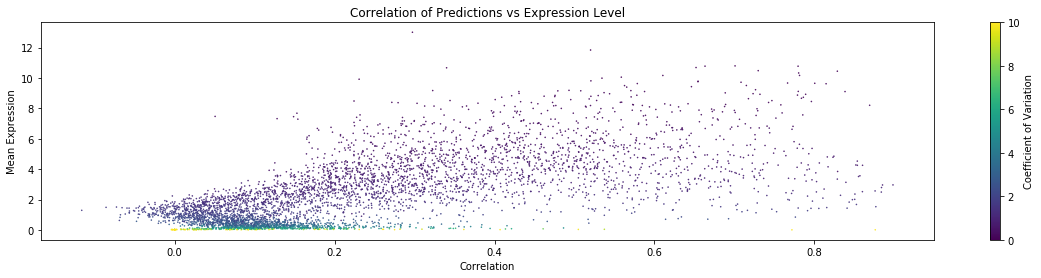

In [112]:
# predicted = np.loadtxt('./predictions/combined_prediction')
correlations = []

for i in range(true_counts.shape[1]):
    correlations.append(pearsonr(true_counts[:,i],predicted[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
print len(correlations)    

    
plt.figure("correlation_vs_mean",figsize=(20,4))
plt.title("Correlation of Predictions vs Expression Level")
plt.scatter(correlations,np.mean(true_counts,axis=0),s=.3,c=variation(true_counts,axis=0))
plt.ylabel("Mean Expression")
plt.xlabel("Correlation")
plt.colorbar(label="Coefficient of Variation")
plt.clim(0,10)
plt.savefig(output_directory+"correlation_vs_mean_vs_cov.png",dpi=500)

4773


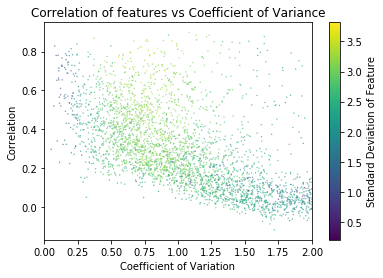

In [113]:
correlations = []

for i in range(true_counts.shape[1]):
    correlations.append(pearsonr(true_counts[:,i],predicted[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
    
print len(correlations)

plt.figure("correlation_vs_cov")
plt.title("Correlation of features vs Coefficient of Variance")
plt.xlabel("Coefficient of Variation")
plt.ylabel("Correlation")
plt.scatter(variation(true_counts,axis=0),correlations,s=.1,c=np.std(true_counts,axis=0))
plt.colorbar(label="Standard Deviation of Feature")
plt.xlim(0,2)
plt.show()

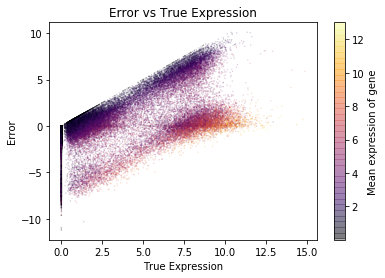

In [114]:
random_mask = np.random.rand(*true_counts.flatten().shape) < (subsampling/10.0)

errors = true_counts - predicted

plt.figure("error_vs_true_expression")
plt.title("Error vs True Expression")
plt.scatter(true_counts.flatten()[random_mask],errors.flatten()[random_mask],s=.1,alpha=.3,c=np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1)).flatten()[random_mask],cmap='inferno')
plt.xlabel("True Expression")
plt.ylabel("Error")
plt.colorbar(label="Mean expression of gene")
plt.savefig(output_directory+"error_vs_true_expression.png")

(4773,)
(1656,)


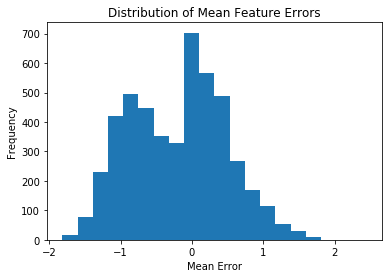

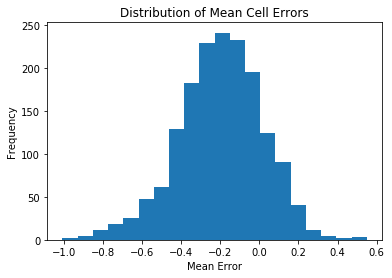

In [115]:
error = predicted - true_counts 

mean_cell_error = np.mean(error,axis=1)
mean_gene_error = np.mean(error,axis=0)

print mean_gene_error.shape
print mean_cell_error.shape

plt.figure()
plt.title("Distribution of Mean Feature Errors")
plt.hist(mean_gene_error,bins=20)
plt.xlabel("Mean Error")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.title("Distribution of Mean Cell Errors")
plt.hist(mean_cell_error,bins=20)
plt.xlabel("Mean Error")
plt.ylabel("Frequency")
plt.show()


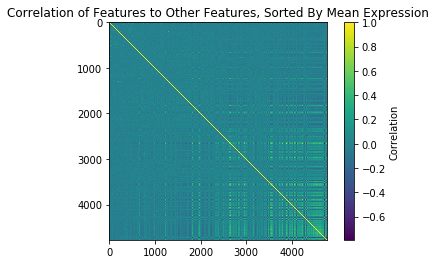

In [116]:
expression_sorted_features = true_counts.T[np.argsort(np.mean(true_counts,axis=0))].T

plt.figure("predictability")
plt.title("Correlation of Features to Other Features, Sorted By Mean Expression")
plt.imshow(np.corrcoef(expression_sorted_features.T))
plt.colorbar(label="Correlation")
plt.show()


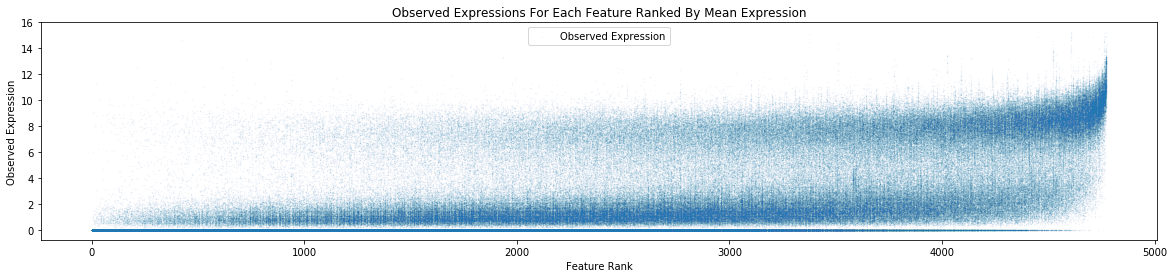

In [117]:
random_mask = np.random.rand(*expression_sorted_features.flatten().shape) < subsampling

plt.figure("ranked_feature_expression",figsize=(20,4))
plt.title("Observed Expressions For Each Feature Ranked By Mean Expression")
plt.scatter(np.tile(np.arange(expression_sorted_features.shape[1]),(expression_sorted_features.shape[0],1)).flatten()[random_mask],expression_sorted_features.flatten()[random_mask],s=.1,alpha=.1, label="Observed Expression")
# plt.scatter(np.mean(true_counts,axis=0),np.median(true_counts,axis=0),c='r',s=.5, label="Mean Expression")
plt.xlabel("Feature Rank")
plt.ylabel("Observed Expression")
plt.legend()
plt.savefig(output_directory+"rank_ordered_expresssion.png")

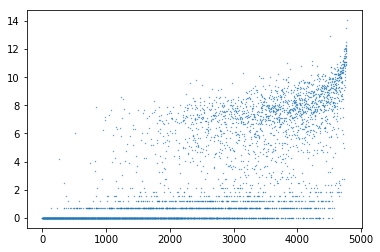

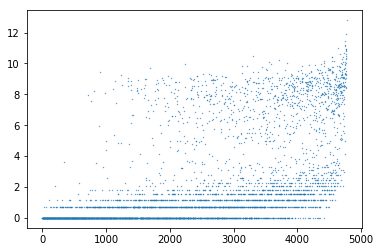

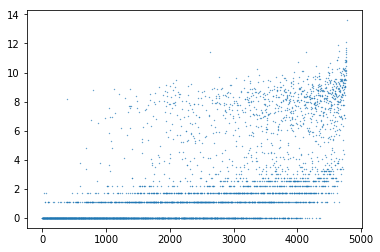

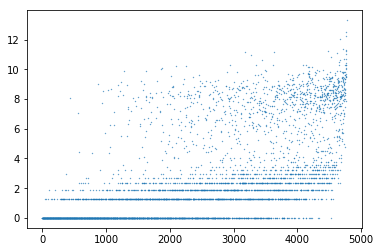

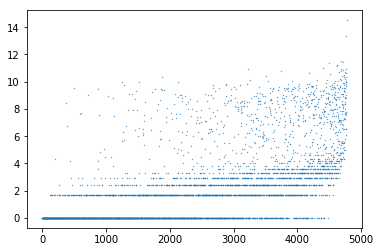

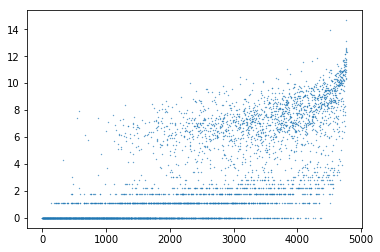

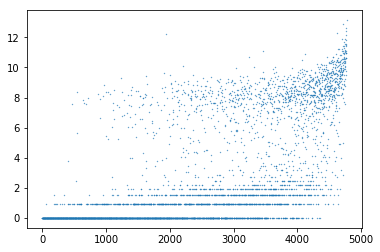

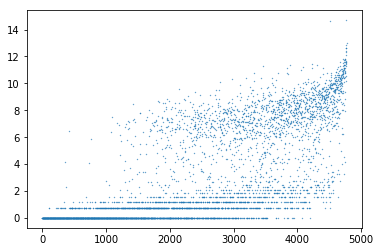

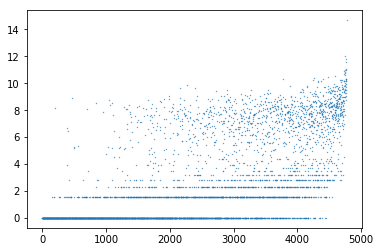

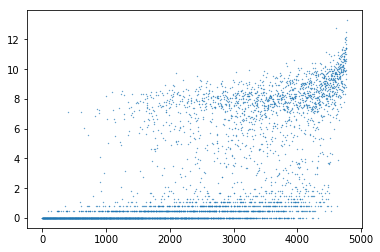

In [118]:
import random

for j in range(10):
    i = random.randint(1,true_counts.shape[0])
    plt.figure('cell_multiplex' + str(i))
    plt.scatter(np.arange(expression_sorted_features.shape[1]),expression_sorted_features[i],s=.1)
    plt.show()


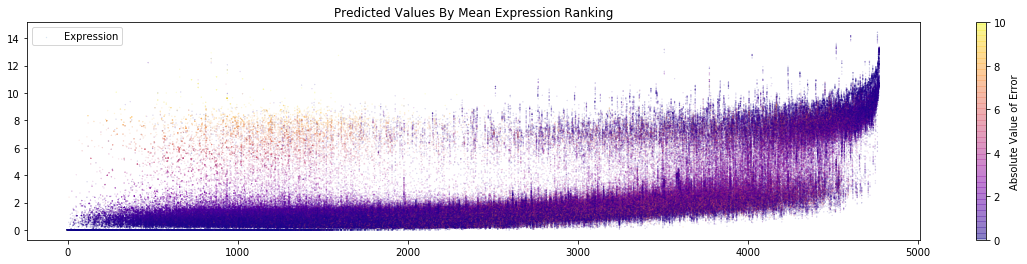

In [119]:
# print true_counts[:10,:10]

expression_sorted_features = true_counts.T[np.argsort(np.mean(true_counts,axis=0))].T

expression_sorted_prediction = predicted.T[np.argsort(np.mean(true_counts,axis=0))].T

random_mask = np.random.rand(*expression_sorted_features.flatten().shape) < (subsampling)

plt.figure("ranked_feature_predicted",figsize=(20,4))
plt.title("Predicted Values By Mean Expression Ranking")
plt.scatter(np.tile(np.arange(expression_sorted_features.shape[1]),(expression_sorted_features.shape[0],1)).flatten()[random_mask],expression_sorted_prediction.flatten()[random_mask],s=.05,alpha=.3,label="Expression",c=np.abs(expression_sorted_prediction-expression_sorted_features).flatten()[random_mask],cmap='plasma')
# plt.scatter(np.arange(expression_sorted_features.shape[1]),np.median(expression_sorted_features,axis=0),c='m',s=.5,label="Medians")
# plt.scatter(np.arange(expression_sorted_features.shape[1]),np.mean(expression_sorted_features,axis=0),c='c',s=.5,label="Means")
plt.legend()
plt.colorbar(label="Absolute Value of Error")
plt.clim(0,10)
plt.savefig(output_directory+"rank_ordered_predicted.png",dpi=500)

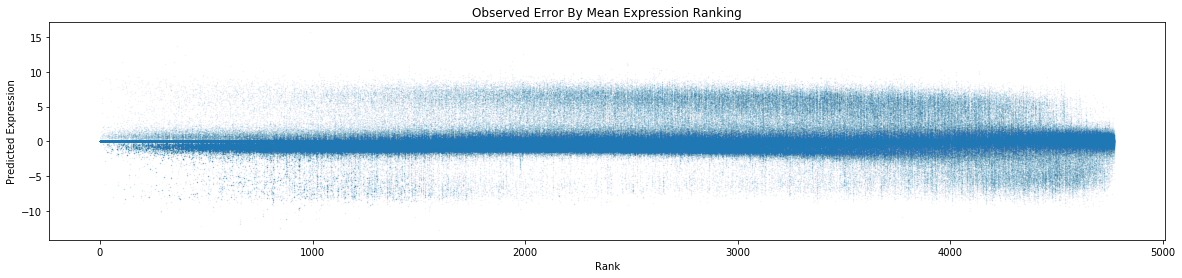

In [120]:
random_mask = np.random.rand(*true_counts.flatten().shape) < subsampling

plt.figure("error_scatter_ranked", figsize=(20,4))
plt.title("Observed Error By Mean Expression Ranking")
plt.scatter(np.tile(np.arange(expression_sorted_features.shape[1]),(expression_sorted_features.shape[0],1)).flatten()[random_mask],(expression_sorted_features - expression_sorted_prediction).flatten()[random_mask],alpha=.1,s=.1)
plt.xlabel("Rank")
plt.ylabel("Predicted Expression")
plt.savefig(output_directory+"rank_ordered_error.png")

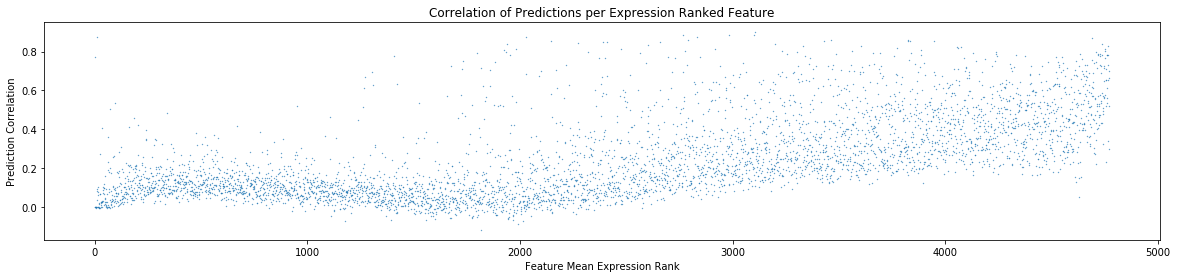

In [121]:
correlations = []

for i in range(true_counts.shape[1]):
    
    correlations.append(pearsonr(true_counts[:,i],predicted[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
        
plt.figure("correlation_vs_mean",figsize=(20,4))
plt.title("Correlation of Predictions per Expression Ranked Feature")
plt.scatter(np.arange(len(correlations)),np.array(correlations)[np.argsort(np.mean(true_counts,axis=0))],s=.1)
plt.xlabel("Feature Mean Expression Rank")
plt.ylabel("Prediction Correlation")
plt.savefig(output_directory+"ranked_correlation.png")

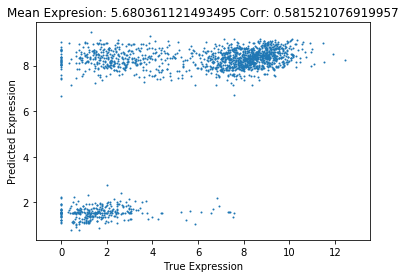

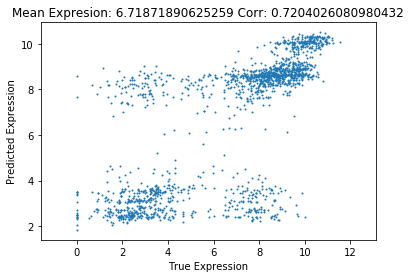

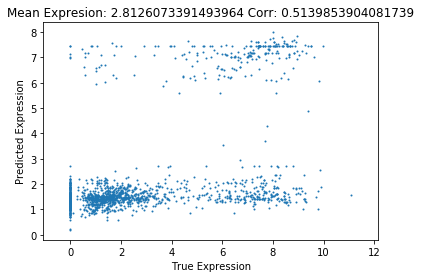

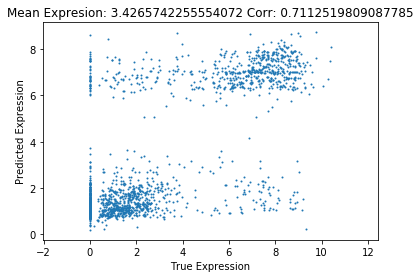

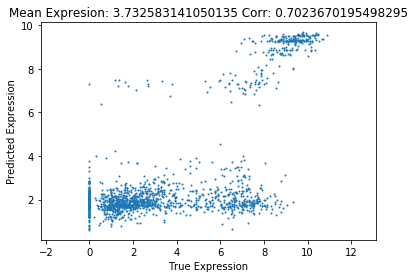

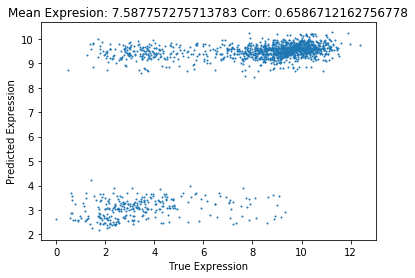

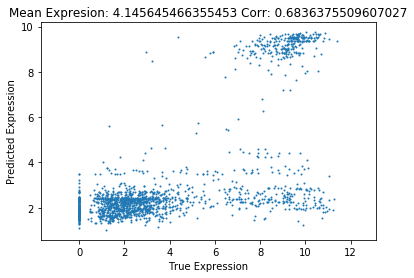

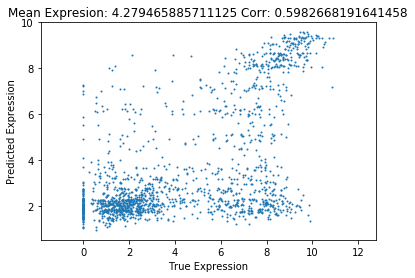

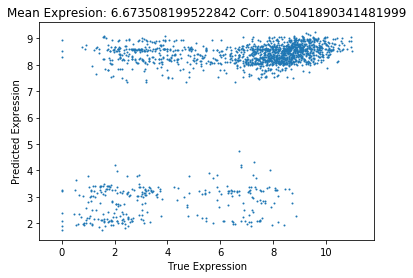

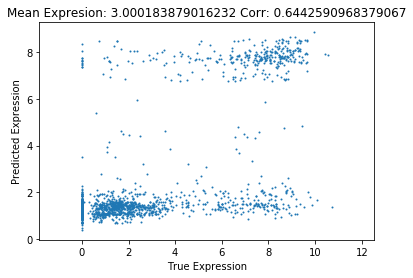

In [122]:
import random
 
j = 0

while j < 10:
    i = random.randint(1,true_counts.shape[1])
    if pearsonr(true_counts[:,i],predicted[:,i])[0] < .5:
        continue
    plt.figure('feature_pred_multiplex' + str(i))
    plt.gca().axis('equal')
    plt.title("Mean Expresion: " + str(np.mean(true_counts[:,i])) + " Corr: " + str(pearsonr(true_counts[:,i],predicted[:,i])[0]))
    plt.scatter(true_counts[:,i],predicted[:,i],s=1)
    plt.xlabel("True Expression")
    plt.ylabel("Predicted Expression")
    plt.show()
    
    j += 1

4773
[0.13229632050057774, 0.04149193286008884, 0.01565037376697074, 0.28233646393859346, 0.46085101007467116, 0.349660928960787, 0.4281985240675718, 0.061089669395130844, 0.010222763000302093, 0.11493481155067631]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]


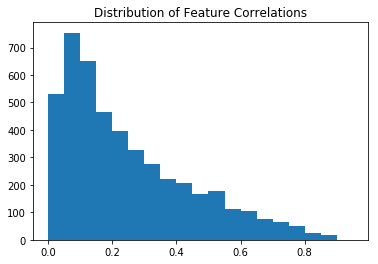

In [123]:
correlations = []

for i in range(true_counts.shape[1]):
    
    correlations.append(pearsonr(true_counts[:,i],predicted[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
    
print len(correlations)
print correlations[:10]
print np.arange(.05,1,.05)
    
plt.figure("correlation_histogram")
plt.title("Distribution of Feature Correlations")
plt.hist(correlations,bins=np.arange(0,1,.05))
plt.savefig(output_directory+"correlation_distributions.png")

In [124]:
# pearsonr(true_counts.flatten(),imputed_gradient.flatten())

In [125]:
# plt.figure()
# plt.title("Median Random Forest Prediction")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_basic_forest,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/basic_error_scatter.png')

In [126]:
# print np.var(predicted,axis=0).shape

# plt.figure("means")
# plt.title("Distribution of Means")
# plt.hist(np.mean(true_counts,axis=0),bins=np.arange(20),alpha=.1,label="Data")
# plt.show()

# plt.figure("stds")
# plt.title("Distribution of Standard Deviations")
# plt.hist(np.std(true_counts,axis=0), bins=np.arange(20),alpha=.1,label="Data")
# plt.show()

# plt.figure("naive_mae")
# plt.title("Distribution of Means of Error")
# plt.hist(np.mean(np.abs(true_counts - predicted), axis=0),bins=np.arange(20),alpha=.1,label="Error")
# plt.show()

# plt.figure("naive_mse")
# plt.title("Distribution of MSE per feature")
# plt.hist(np.mean((true_counts - predicted)**2, axis=0),bins=np.arange(20),alpha=.1,label="Error")
# plt.show()

# np.random.shuffle(predicted)
# plt.figure("mae_shuffled")
# plt.title("Distribution of Means of Error (Shuffled)")
# plt.hist(np.var(np.abs(true_counts - predicted),axis=0),bins=np.arange(20),alpha=.1,label="Shuffled")
# # plt.legend()
# plt.show()


In [127]:
# plt.figure()
# plt.title("Gradient Random Forest Prediction")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_gradient,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/gradient_error_scatter.png')

In [128]:
# print np.sum(true_counts,axis=1).shape

# plt.figure("cell_histograms")
# plt.title("Frequency of Total Cell Counts")
# plt.hist(np.sum(true_counts,axis=1))

# plt.show()

(1656,)


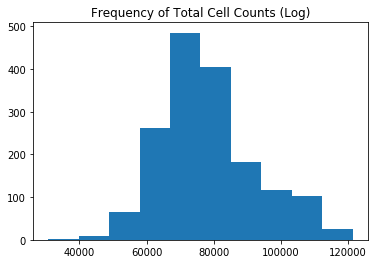

In [129]:
power = 2

print np.sum(true_counts,axis=1).shape

plt.figure("cell_histograms")
plt.title("Frequency of Total Cell Counts (Log)")
plt.hist(np.sum(np.power(true_counts,power),axis=1))
plt.show()

In [130]:
# plt.figure()
# plt.title("KNN Imputation")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_knn,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/knn_error_scatter.png')

In [131]:
# plt.figure()
# plt.title("Soft Imputation Prediction")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_soft,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/soft_error_scatter.png')

In [132]:
# plt.figure()
# plt.title("Sklearn Random Forest Prediction")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_builtin,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/sklearn_rf_error_scatter.png')

In [133]:
# true_iris = np.loadtxt('./testing/iris.trunc')
# dropped_iris = np.loadtxt('./testing/iris.drop')
# nan_iris = dropped_iris.copy()
# nan_iris[nan_iris == 0] = np.nan

# forest_prediction = np.loadtxt('./iris_test/run.prediction')

In [134]:
# soft_iris = fi.SoftImpute().complete(nan_iris)

# knn_iris = fi.KNN(k=15).complete(nan_iris)

# factorized_iris = fi.MatrixFactorization().complete(nan_iris)

# iterative_iris = fi.IterativeSVD(rank=5).complete(nan_iris)

In [135]:

# guess_mask = dropped_iris.flatten() == 0

# truth = true_iris.flatten()[guess_mask] 

# print "Pearson correlations of Soft, KNN, Factorized, and Forest"
# print pearsonr(soft_iris.flatten()[guess_mask],truth)
# print pearsonr(knn_iris.flatten()[guess_mask],truth)
# print pearsonr(factorized_iris.flatten()[guess_mask],truth)
# print pearsonr(forest_prediction.flatten()[guess_mask],truth)

# print "MSE of Soft, KNN, Factorized, and Forest"
# print np.mean(((soft_iris.flatten()[guess_mask] - truth) ** 2))
# print np.mean(((knn_iris.flatten()[guess_mask] - truth) ** 2))
# print np.mean(((factorized_iris.flatten()[guess_mask] - truth) ** 2))
# print np.mean(((forest_prediction.flatten()[guess_mask] - truth) ** 2))


In [136]:
# plt.figure("soft_iris")
# plt.title("Soft Imptuation of the Iris Dataset")
# plt.xlabel("Imputed")
# plt.ylabel("True")
# plt.scatter(soft_iris.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
# plt.plot([0,8],[0,8])
# plt.tight_layout()
# plt.savefig("figures/soft_iris_scatter.png")

# plt.figure("knn_iris")
# plt.title("KNN Imptuation of the Iris Dataset")
# plt.xlabel("Imputed")
# plt.ylabel("True")
# plt.scatter(knn_iris.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
# plt.plot([0,8],[0,8])
# plt.tight_layout()
# plt.savefig("figures/knn_iris_scatter.png")

# plt.figure("factorized_iris")
# plt.title("Matrix Factorization Imptuation of the Iris Dataset")
# plt.xlabel("Imputed")
# plt.ylabel("True")
# plt.scatter(factorized_iris.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
# plt.plot([0,8],[0,8])
# plt.tight_layout()
# plt.savefig("figures/factorized_iris_scatter.png")

# plt.figure("forest_iris")
# plt.title("Median Forest (Non-Gradient) Imptuation of the Iris Dataset")
# plt.xlabel("Imputed")
# plt.ylabel("True")
# plt.scatter(forest_prediction.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
# plt.plot([0,8],[0,8])
# plt.tight_layout()
# plt.savefig("figures/forest_iris_scatter.png")

In [137]:
# nan_counts = held_out_counts.copy()
# nan_counts[nan_counts == 0] = np.nan

# soft_blood = fi.SoftImpute().complete(nan_counts)

# knn_blood = fi.KNN(k=15).complete(nan_counts)

In [138]:
# mask = mask.astype(dtype=bool)
# # mask = np.logical_and(true_counts != 0, mask)

# truth = true_counts[mask].flatten()
# pred_basic_forest = imputed_basic[mask].flatten()
# pred_gradient = imputed_gradient[mask].flatten()

# pred_builtin = imputed_builtin[mask].flatten()

# pred_knn = knn_blood[mask].flatten()
# pred_soft = soft_blood[mask].flatten()

# print "Pearson of random, gradient, builtin, knn, and soft"

# print pearsonr(truth,pred_basic_forest)
# print pearsonr(truth,pred_gradient)
# print pearsonr(truth,pred_builtin)
# print pearsonr(truth,pred_knn)
# print pearsonr(truth,pred_soft)

# print "MSE of random, gradient, builtin, knn, and soft"

# print np.mean((pred_basic_forest - truth) ** 2)
# print np.mean((pred_gradient - truth) ** 2)
# print np.mean((pred_builtin - truth) ** 2)
# print np.mean((pred_knn - truth) ** 2)
# print np.mean((pred_soft - truth) ** 2)

# print "Mean absolute error"
# print np.mean(np.abs(pred_basic_forest - truth))
# print np.mean(np.abs(pred_gradient - truth))
# print np.mean(np.abs(pred_builtin - truth))
# print np.mean(np.abs(pred_knn - truth))
# print np.mean(np.abs(pred_soft - truth))


In [139]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from scipy.stats import pearsonr

# import time

# start_time = time.time()

# for i in range(10):

#     print "Selecting features"
    
#     in_features = np.random.rand(true_counts.shape[1]) > .7
#     out_features = np.logical_not(in_features)

#     training_samples = np.random.rand(true_counts.shape[0]) > .3
#     testing_samples = np.logical_not(training_samples)

#     training_in = true_counts[training_samples].T[in_features].T
#     training_out = true_counts[training_samples].T[out_features].T

#     testing_in = true_counts[testing_samples].T[in_features].T
#     testing_out = true_counts[testing_samples].T[out_features].T

#     print "Initializing feature"
    
#     forest = GradientBoostingRegressor()

#     print "Fitting"
    
#     forest.fit(training_in,training_out)
    
#     print "Predicting"
    
#     prediction = forest.predict(testing_in)

#     print np.sum(in_features)
#     print np.sum(out_features)
#     print np.sum(training_samples)
#     print np.sum(testing_samples)
    
#     print prediction.shape
#     print testing_out.shape
    
#     print "Pearson R"
#     print pearsonr(testing_out.flatten(),prediction.flatten())
    
#     print "MSE"
#     print np.mean((prediction.flatten() - testing_out.flatten()) ** 2)
    
#     print "MAE"
#     print np.mean(np.abs(prediction.flatten() - testing_out.flatten()))

    
# print "Fitting done"

# end_time = time.time()

# print start_time - end_time

In [140]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from scipy.stats import pearsonr

# import time

# start_time = time.time()

# for i in range(10):

#     print "Selecting features"
    
#     in_features = np.random.rand(true_counts.shape[1]) > .7
#     out_features = np.logical_not(in_features)

#     training_samples = np.random.rand(true_counts.shape[0]) > .3
#     testing_samples = np.logical_not(training_samples)

#     training_in = true_counts[training_samples].T[in_features].T
#     training_out = true_counts[training_samples].T[out_features].T

#     testing_in = true_counts[testing_samples].T[in_features].T
#     testing_out = true_counts[testing_samples].T[out_features].T

#     print "Initializing feature"
    
#     forest = RandomForestRegressor(n_estimators=100,min_samples_split=50,n_jobs=int(10),max_features=400)

#     print "Fitting"
    
#     forest.fit(training_in,training_out)
    
#     print "Predicting"
    
#     prediction = forest.predict(testing_in)

#     print np.sum(in_features)
#     print np.sum(out_features)
#     print np.sum(training_samples)
#     print np.sum(testing_samples)
    
#     print prediction.shape
#     print testing_out.shape
    
#     print "Pearson R"
#     print pearsonr(testing_out.flatten(),prediction.flatten())
    
#     print "MSE"
#     print np.mean((prediction.flatten() - testing_out.flatten()) ** 2)
    
#     print "MAE"
#     print np.mean(np.abs(prediction.flatten() - testing_out.flatten()))

    
# print "Fitting done"

# end_time = time.time()

# print start_time - end_time